In [79]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [80]:
training_dataset = pd.read_csv("train.csv")

In [81]:
training_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
training_dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [83]:
training_dataset.drop(columns=["PassengerId", "Name"], inplace=True)

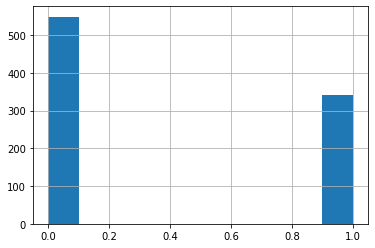

In [84]:
training_dataset["Survived"].hist()

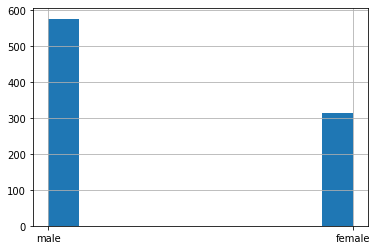

In [85]:
training_dataset["Sex"].hist()

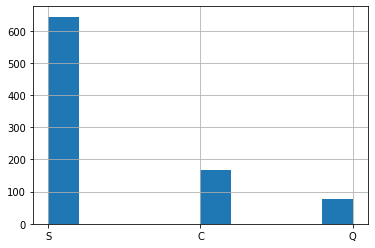

In [86]:
training_dataset["Embarked"].hist()

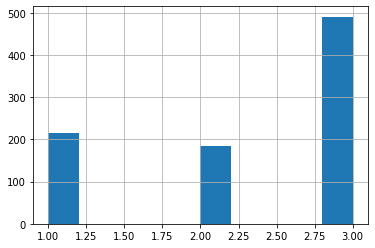

In [87]:
training_dataset["Pclass"].hist()

Survived
0    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

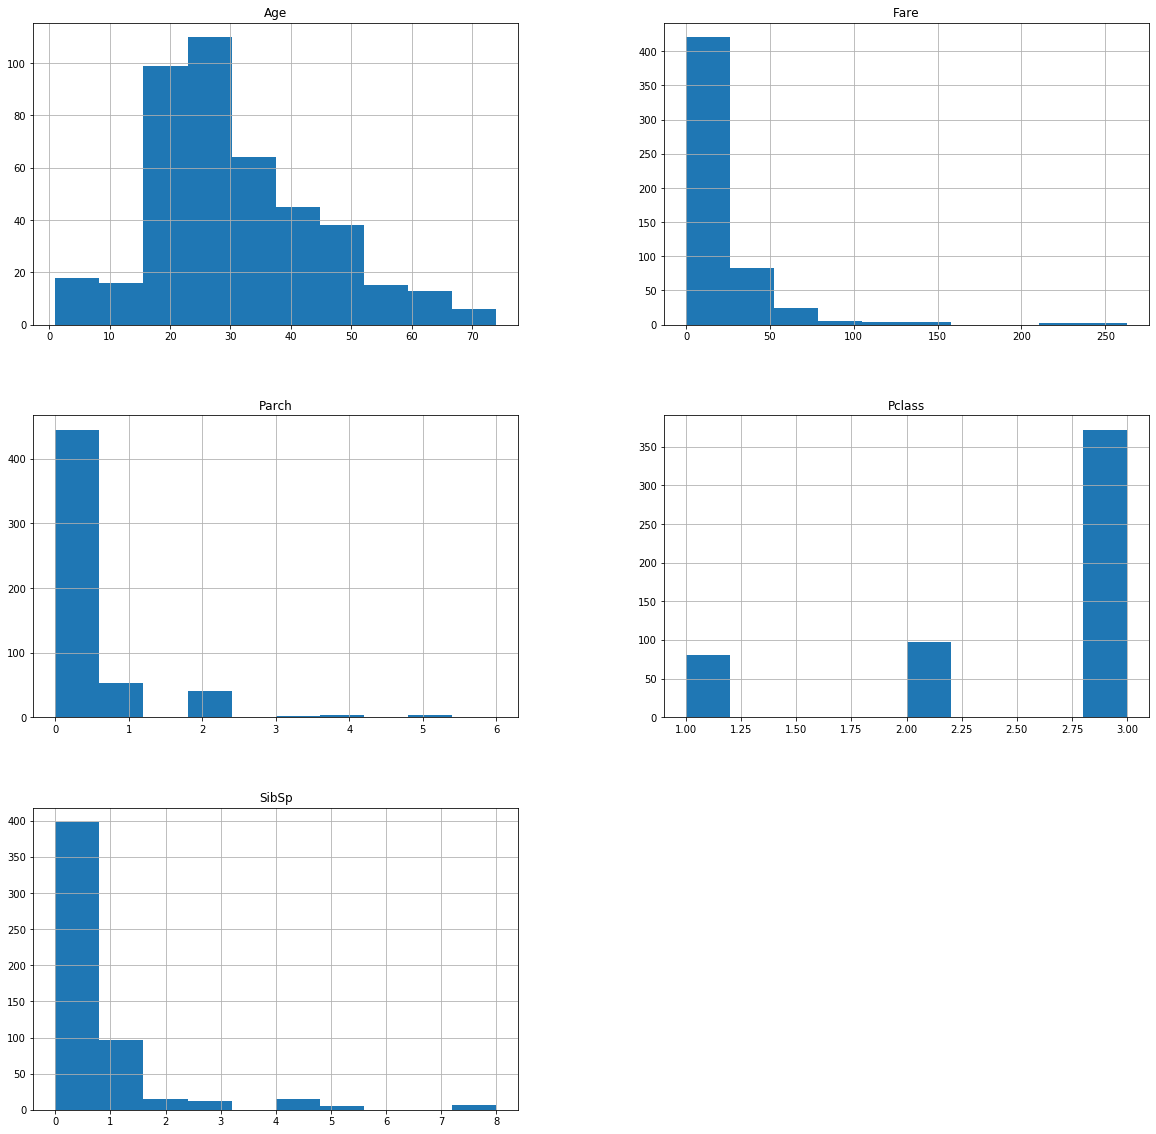

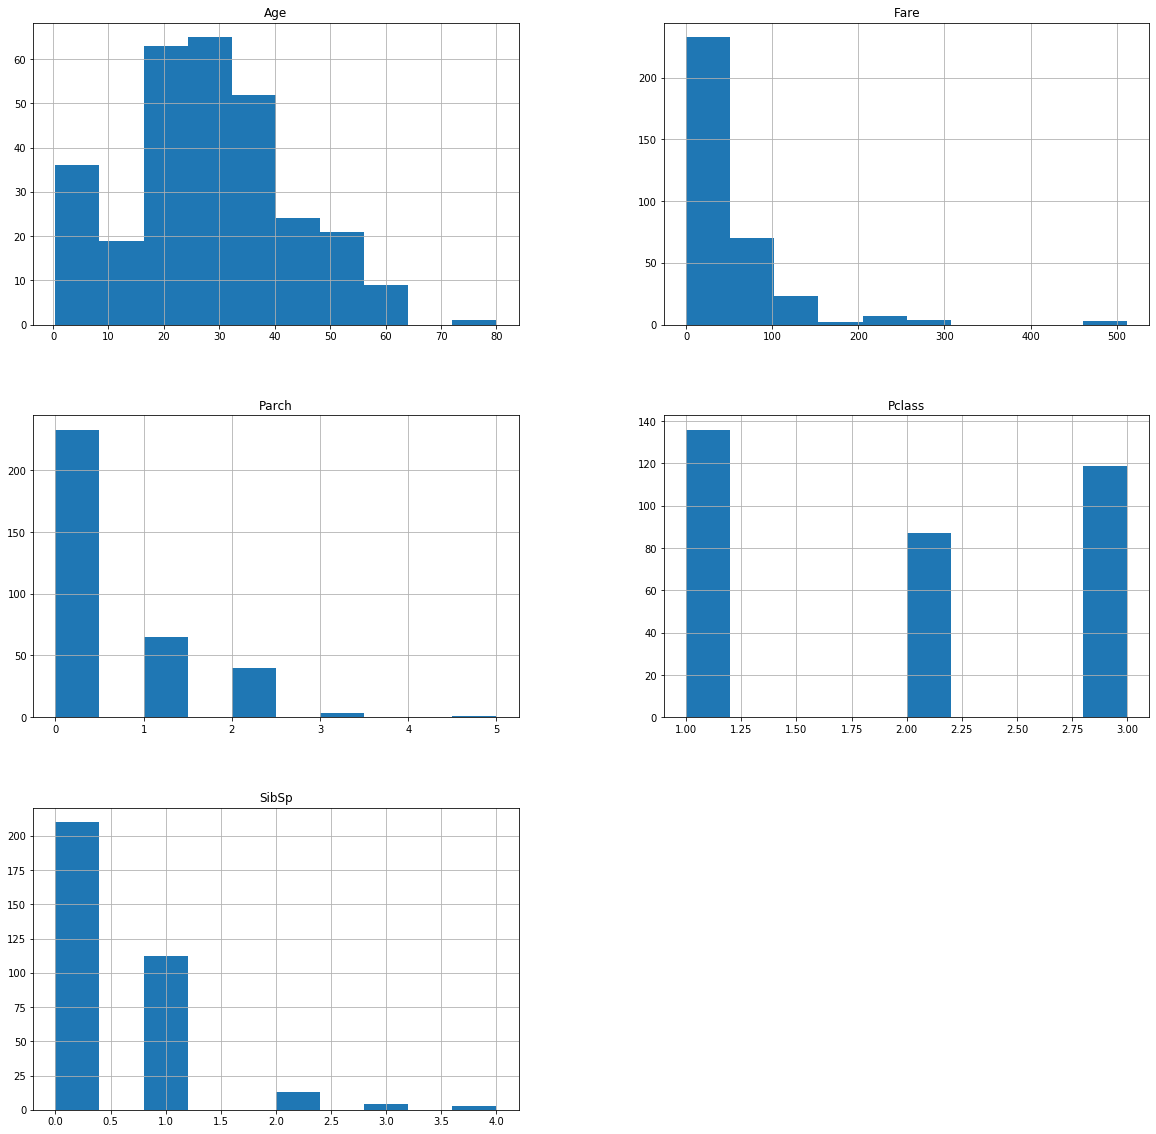

In [88]:
training_dataset.groupby("Survived").hist(figsize=(20, 20))

In [89]:
training_dataset["Cabin"].isnull().sum()

687

In [90]:
training_dataset["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [91]:
training_dataset["Cabin"] = training_dataset["Cabin"].fillna("Other")

In [97]:
training_dataset = pd.concat([training_dataset, 
                              pd.get_dummies(training_dataset["Embarked"]), 
                              pd.get_dummies(training_dataset["Sex"]),
                              pd.get_dummies(training_dataset["Cabin"]),
                              pd.get_dummies(training_dataset["Ticket"]),
                             ], axis=1)

In [98]:
training_dataset.drop(columns=["Embarked", "Sex", "Cabin", "Ticket"], inplace=True)

In [100]:
Y = training_dataset.loc[:, "Survived"]
X = training_dataset.iloc[:, 1:]

In [101]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'C', 'Q',
       ...
       'STON/O2. 3101290', 'SW/PP 751', 'W./C. 14258', 'W./C. 14263',
       'W./C. 6607', 'W./C. 6608', 'W./C. 6609', 'W.E.P. 5734', 'W/C 14208',
       'WE/P 5735'],
      dtype='object', length=842)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True)

In [103]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [104]:
xgb_cls = XGBClassifier()

In [106]:
xgb_cls.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [107]:
from sklearn.metrics import accuracy_score

In [108]:
y_pred = xgb_cls.predict(X_test)

In [109]:
accuracy_score(y_test, y_pred)

0.8251121076233184